In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [2]:
df =pd.read_excel(r'F:\ML Projects\Unna Bakery\Sales_Cleaned.xlsx')

In [3]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [4]:
df

,Posting Date,Customer/Vendor Name,Item/Service Description,Quantity,Total Sales $,City,State,Warehouse Name,Group Name,Flavor
0,2018-02-03,Quincy,Unna Bake - Raspberry Cave cookie (6 x 3.4 OZ),1,20.85,New York,NY,New Jersey,1001_WFM NE,Raspberry
1,2018-02-03,Quincy,Unna Bake - Farmer's Cookie (6 x 3.4 OZ),1,17.13,New York,NY,New Jersey,1001_WFM NE,Butter & Almonds
2,2018-02-03,Quincy,Unna Bake -Vanilla Dream Cookie (6 x 3.4 OZ),1,17.13,New York,NY,New Jersey,1001_WFM NE,Vanilla
3,2018-02-03,Quincy,Unna Bake -Ginger Snap Cookie (6 x 3.4 OZ),1,20.85,New York,NY,New Jersey,1001_WFM NE,Ginger
4,2018-02-03,Quincy,Unna Bake -Cardamom Crisp Cookie (6 x 3.4 OZ),1,20.15,New York,NY,New Jersey,1001_WFM NE,Cardamom
...,...,...,...,...,...,...,...,...,...,...
8463,2021-02-27,Fresh Direct - Bronx,Unna Bakery - Coconut Oat - (6 x 5.5 OZ),1,18.00,Bronx,NY,New Jersey,4002_Fresh Direct,Coconut
8464,2021-02-27,Fresh Direct - Bronx,Unna Bakery - Vanilla Cookie - (6 x 5.5 OZ),2,36.00,Bronx,NY,New Jersey,4002_Fresh Direct,Vanilla
8465,2021-02-27,Fresh Direct - Bronx,Unna Bakery - Brown Butter Cookie - (6 x 5.5 OZ),2,36.00,Bronx,NY,New Jersey,4002_Fresh Direct,Brown Butter
8466,2021-02-27,WFM - NE WEE - WEEHAWKEN,Unna Bakery - Lemon Lime - (6 x 5.5 OZ),1,20.10,Weehawken,NJ,New Jersey,1001_WFM NE,Lemon Lime


In [5]:
df_copy=df.copy()

In [6]:
df_copy['Month']= df['Posting Date'].dt.month_name()
df_copy['Day'] = df['Posting Date'].dt.day_name()

In [7]:
df_copy.columns

Index(['Posting Date', 'Customer/Vendor Name', 'Item/Service Description',
       'Quantity', 'Total Sales $', 'City', 'State', 'Warehouse Name',
       'Group Name', 'Flavor', 'Month', 'Day'],
      dtype='object')

In [8]:
df_copy.isnull().sum()

Posting Date                0
Customer/Vendor Name        0
Item/Service Description    0
Quantity                    0
Total Sales $               0
City                        0
State                       0
Warehouse Name              0
Group Name                  0
Flavor                      0
Month                       0
Day                         0
dtype: int64

In [9]:
df_copy.nunique()

Posting Date                891
Customer/Vendor Name        511
Item/Service Description     23
Quantity                     23
Total Sales $               141
City                        175
State                        10
Warehouse Name                3
Group Name                   40
Flavor                        9
Month                        12
Day                           7
dtype: int64

In [10]:
df_copy['Flavor'].unique()

array(['Raspberry', 'Butter & Almonds', 'Vanilla', 'Ginger', 'Cardamom',
       'Coconut', 'Ginger & Vanilla', 'Lemon Lime', 'Brown Butter'],
      dtype=object)

In [11]:
df_copy.describe()

,Quantity,Total Sales $
count,8468.000000,8468.000000
mean,1.358644,26.651169
std,1.341165,29.818349
min,1.000000,0.000000
25%,1.000000,17.130000
50%,1.000000,20.100000
75%,1.000000,24.300000
max,42.000000,756.000000


In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8468 entries, 0 to 8467
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Posting Date              8468 non-null   datetime64[ns]
 1   Customer/Vendor Name      8468 non-null   object        
 2   Item/Service Description  8468 non-null   object        
 3   Quantity                  8468 non-null   int64         
 4   Total Sales $             8468 non-null   float64       
 5   City                      8468 non-null   object        
 6   State                     8468 non-null   object        
 7   Warehouse Name            8468 non-null   object        
 8   Group Name                8468 non-null   object        
 9   Flavor                    8468 non-null   object        
 10  Month                     8468 non-null   object        
 11  Day                       8468 non-null   object        
dtypes: datetime64[ns](1)

In [13]:
df_copy.drop(columns=['Posting Date', 'Quantity', 'Group Name'], inplace=True)

In [14]:
df_copy.rename(columns = {'Total Sales $':'Sales', 'Customer/Vendor Name':'Vendor','Warehouse Name':'Warehouse','Item/Service Description':'Size'}, inplace = True)

In [15]:
df_copy

,Vendor,Size,Sales,City,State,Warehouse,Flavor,Month,Day
0,Quincy,Unna Bake - Raspberry Cave cookie (6 x 3.4 OZ),20.85,New York,NY,New Jersey,Raspberry,February,Saturday
1,Quincy,Unna Bake - Farmer's Cookie (6 x 3.4 OZ),17.13,New York,NY,New Jersey,Butter & Almonds,February,Saturday
2,Quincy,Unna Bake -Vanilla Dream Cookie (6 x 3.4 OZ),17.13,New York,NY,New Jersey,Vanilla,February,Saturday
3,Quincy,Unna Bake -Ginger Snap Cookie (6 x 3.4 OZ),20.85,New York,NY,New Jersey,Ginger,February,Saturday
4,Quincy,Unna Bake -Cardamom Crisp Cookie (6 x 3.4 OZ),20.15,New York,NY,New Jersey,Cardamom,February,Saturday
...,...,...,...,...,...,...,...,...,...
8463,Fresh Direct - Bronx,Unna Bakery - Coconut Oat - (6 x 5.5 OZ),18.00,Bronx,NY,New Jersey,Coconut,February,Saturday
8464,Fresh Direct - Bronx,Unna Bakery - Vanilla Cookie - (6 x 5.5 OZ),36.00,Bronx,NY,New Jersey,Vanilla,February,Saturday
8465,Fresh Direct - Bronx,Unna Bakery - Brown Butter Cookie - (6 x 5.5 OZ),36.00,Bronx,NY,New Jersey,Brown Butter,February,Saturday
8466,WFM - NE WEE - WEEHAWKEN,Unna Bakery - Lemon Lime - (6 x 5.5 OZ),20.10,Weehawken,NJ,New Jersey,Lemon Lime,February,Saturday


In [16]:
df_copy['Size']=df_copy['Size'].str.split("(").str[1]

In [17]:

df_copy['Size'] = [x[0:-1] for x in df_copy['Size']]

In [18]:
df_copy['Size']

0       6 x 3.4 OZ
1       6 x 3.4 OZ
2       6 x 3.4 OZ
3       6 x 3.4 OZ
4       6 x 3.4 OZ
           ...    
8463    6 x 5.5 OZ
8464    6 x 5.5 OZ
8465    6 x 5.5 OZ
8466    6 x 5.5 OZ
8467    6 x 5.5 OZ
Name: Size, Length: 8468, dtype: object

## Relationship Analysis

In [19]:
corr= df_copy.corr()

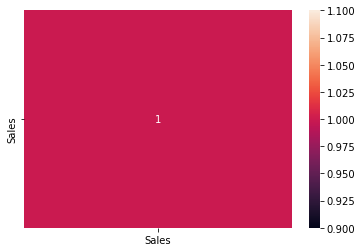

In [20]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

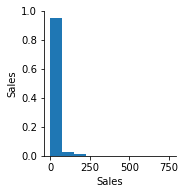

In [21]:
sns.pairplot(df_copy)

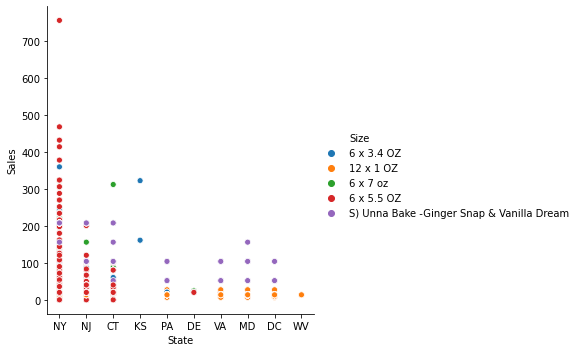

In [22]:
sns.relplot(x='State', y='Sales', hue='Size', data=df_copy)

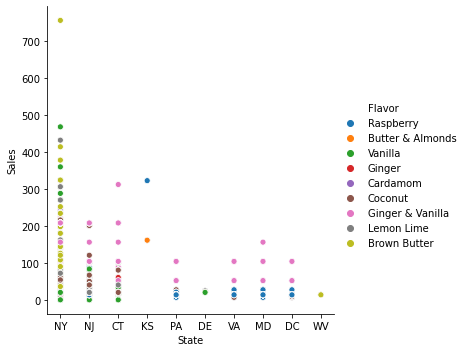

In [23]:
sns.relplot(x='State', y='Sales', hue='Flavor', data=df_copy)

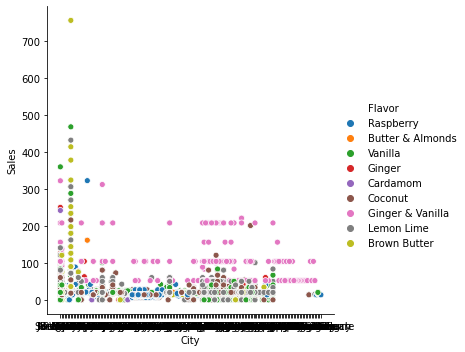

In [24]:
sns.relplot(x='City', y='Sales', hue='Flavor', data=df_copy)

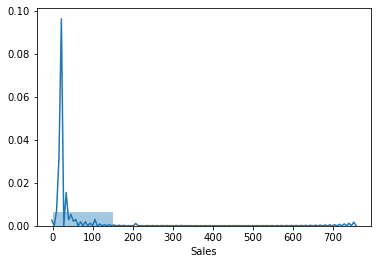

In [25]:
sns.distplot(df_copy['Sales'], bins=5)

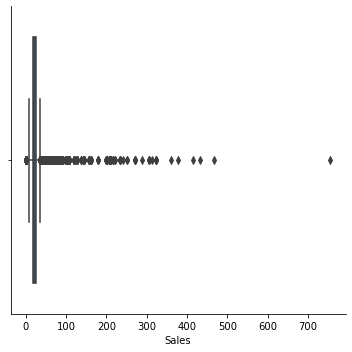

In [26]:
sns.catplot(x='Sales',kind='box', data=df_copy)

In [27]:
df_copy['Sales'].describe()

count    8468.000000
mean       26.651169
std        29.818349
min         0.000000
25%        17.130000
50%        20.100000
75%        24.300000
max       756.000000
Name: Sales, dtype: float64

## 3-Modelling

## 1- Detecting & Removing Outliers

In [28]:
df_copy.describe()

,Sales
count,8468.000000
mean,26.651169
std,29.818349
min,0.000000
25%,17.130000
50%,20.100000
75%,24.300000
max,756.000000


In [29]:
df_copy.columns

Index(['Vendor', 'Size', 'Sales', 'City', 'State', 'Warehouse', 'Flavor',
       'Month', 'Day'],
      dtype='object')

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8468 entries, 0 to 8467
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Vendor     8468 non-null   object 
 1   Size       8468 non-null   object 
 2   Sales      8468 non-null   float64
 3   City       8468 non-null   object 
 4   State      8468 non-null   object 
 5   Warehouse  8468 non-null   object 
 6   Flavor     8468 non-null   object 
 7   Month      8468 non-null   object 
 8   Day        8468 non-null   object 
dtypes: float64(1), object(8)
memory usage: 595.5+ KB



fig, axs = plt.subplots(4,figsize=(6,18))
x = df_copy[['Vendor','Sales','City','Size','State','Warehouse','Flavor','Month','Day']]
for i,column in enumerate(x):
    sns.boxplot(df_copy[column], ax=axs[i])

Text(0.5, 1.0, 'Total Sales Before Removing outliers')

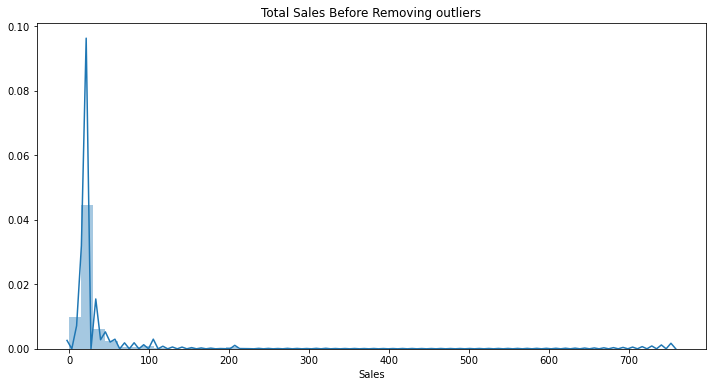

In [31]:
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(df_copy['Sales'])
plt.title('Total Sales Before Removing outliers')

## Using IQR (Inter Quartile Range)

In [32]:
Q1 = np.percentile(df_copy['Sales'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_copy['Sales'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_copy.shape)
 
# Upper bound
upper = np.where(df_copy['Sales'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_copy['Sales'] <= (Q1-1.5*IQR))
print("upper bound: ", upper)
print("lower bound: ", lower)

df_copy.drop(upper[0], inplace = True)
df_copy.drop(lower[0], inplace = True)
 
print("New Shape: ", df_copy.shape)


Old Shape:  (8468, 9)
upper bound:  (array([  19,   38,  235, ..., 8462, 8464, 8465], dtype=int64),)
lower bound:  (array([1289, 1308, 1348, 1349, 1350, 1351, 1397, 1398, 1419, 1474, 1502,
       1646, 1682, 1706, 1707, 1708, 1723, 1726, 1812, 1813, 1879, 1880,
       1881, 1882, 1883, 1884, 1902, 1918, 1934, 1938, 1940, 1966, 2036,
       2037, 2040, 2048, 2070, 2071, 2072, 2096, 2113, 2137, 2138, 2159,
       2186, 2187, 2199, 2271, 2272, 2277, 2278, 2279, 2286, 2294, 2295,
       2296, 2299, 2391, 2430, 2446, 2448, 2455, 2456, 2467, 2520, 2521,
       2522, 2524, 2525, 2526, 2529, 2530, 2531, 2532, 2533, 2534, 2543,
       2558, 2559, 2560, 2587, 2588, 2589, 2600, 2602, 2627, 2728, 2731,
       2732, 2733, 2763, 2797, 2835, 2855, 2959, 2993, 2995, 2996, 3016,
       3039, 3040, 3043, 3100, 3124, 3130, 3157, 3162, 3165, 3168, 3172,
       3186, 3194, 3198, 3238, 3243, 3266, 3312, 3343, 3344, 3345, 3353,
       3375, 3392, 3393, 3406, 3407, 3408, 3409, 3412, 3440, 3445, 3455,
       3

Text(0.5, 1.0, 'Total Sales After Removing outliers using IQR')

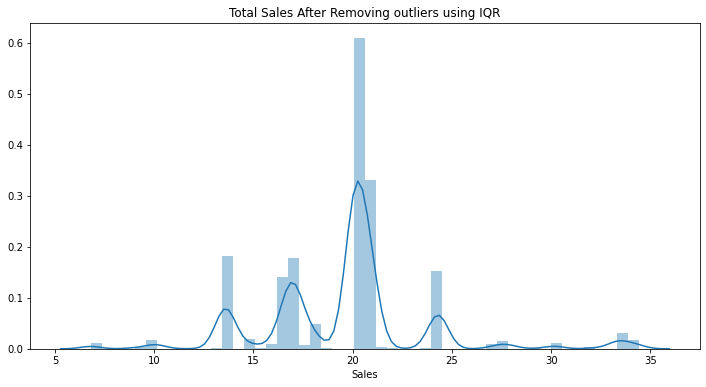

In [33]:
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(df_copy['Sales'])
plt.title('Total Sales After Removing outliers using IQR')

In [34]:
df_copy.describe()

,Sales
count,6777.000000
mean,19.569441
std,4.110349
min,6.800000
25%,17.090000
50%,20.100000
75%,20.850000
max,34.440000


plt.figure(figsize=(15,15))
sns.scatterplot(x='Year', y='Total Sales $', hue='Flavor', data=df_copy, s=150)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Sales $', fontsize=25)
plt.xticks(np.arange(df_copy['Year'].min(),df_copy['Year'].max()+1, 1.0))
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.legend(loc=2, prop={'size': 20})


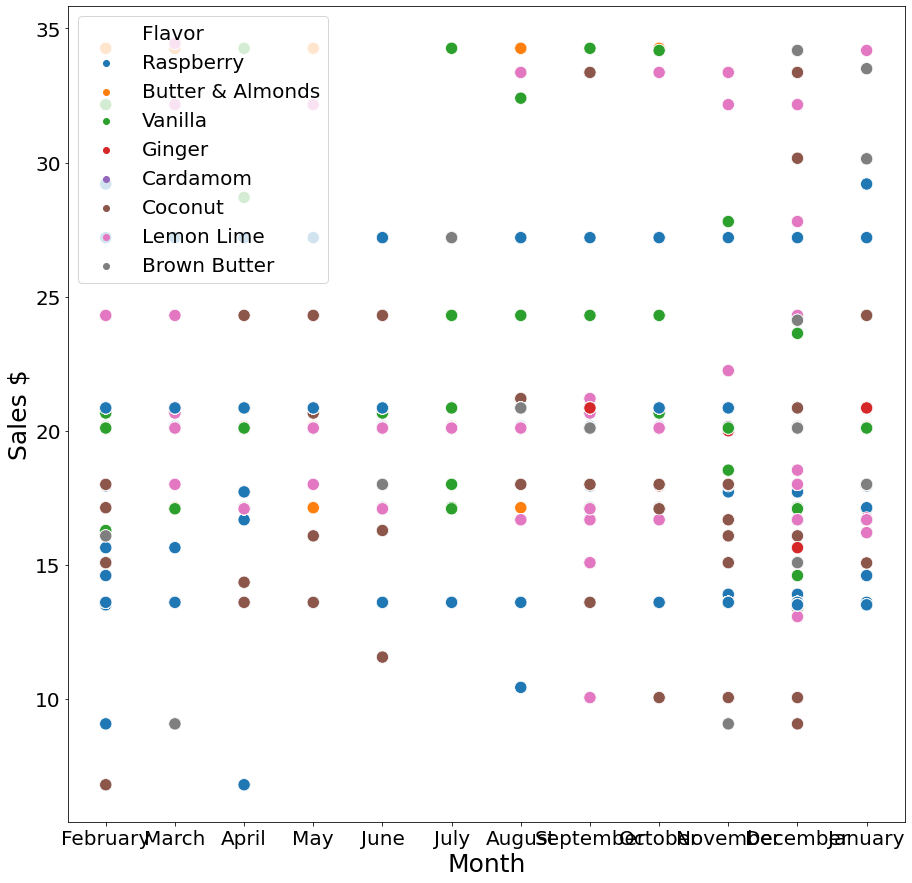

In [35]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='Month', y='Sales', hue='Flavor', data=df_copy, s=150)
plt.xlabel('Month', fontsize=25)
plt.ylabel('Sales $', fontsize=25)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.legend(loc=2, prop={'size': 20})

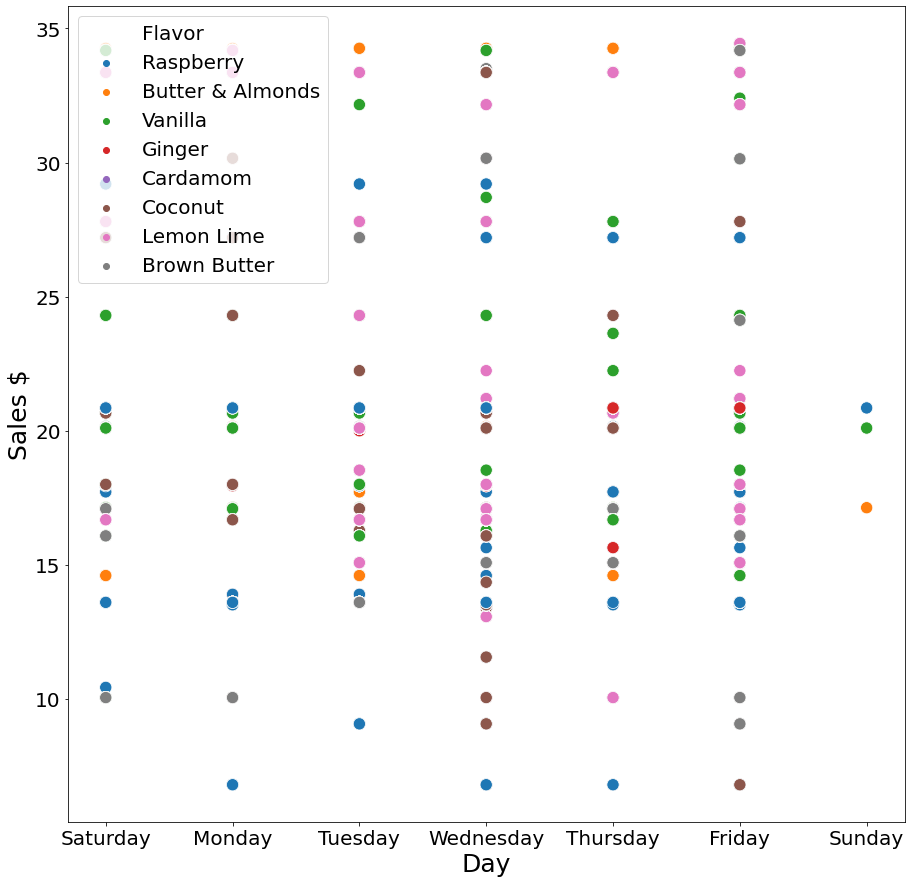

In [36]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='Day', y='Sales', hue='Flavor', data=df_copy, s=150)
plt.xlabel('Day', fontsize=25)
plt.ylabel('Sales $', fontsize=25)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.legend(loc=2, prop={'size': 20})

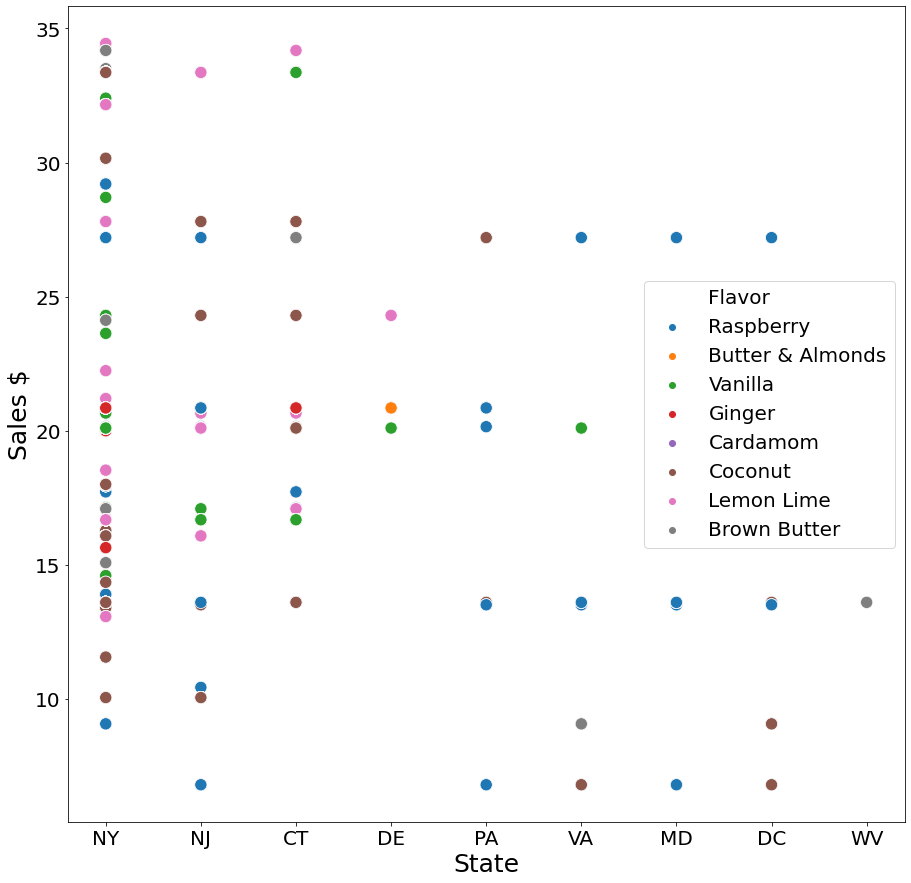

In [37]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='State', y='Sales', hue='Flavor', data=df_copy, s=150)
plt.xlabel('State', fontsize=25)
plt.ylabel('Sales $', fontsize=25)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.legend(prop={'size': 20})

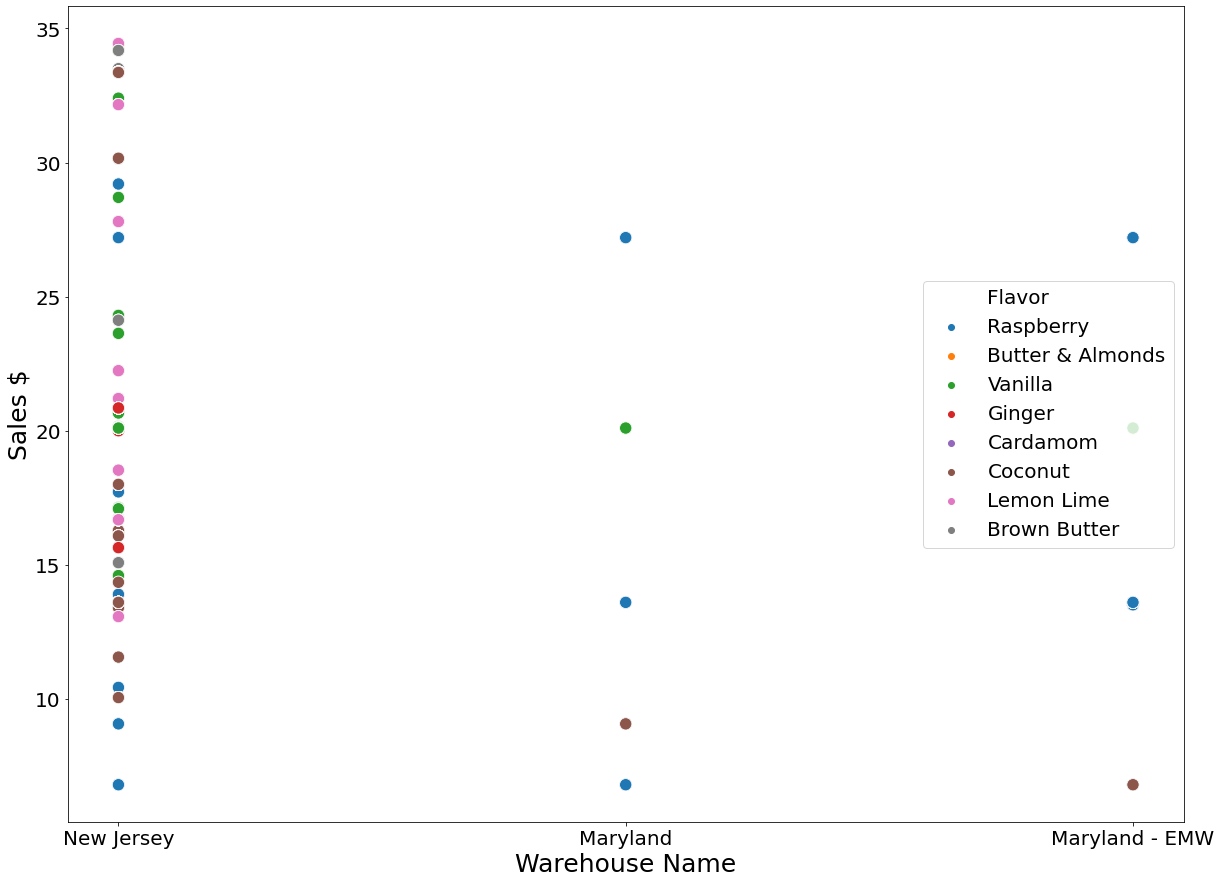

In [38]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='Warehouse', y='Sales', hue='Flavor', data=df_copy, s=150)
plt.xlabel('Warehouse Name', fontsize=25)
plt.ylabel('Sales $', fontsize=25)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.legend(prop={'size': 20})

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

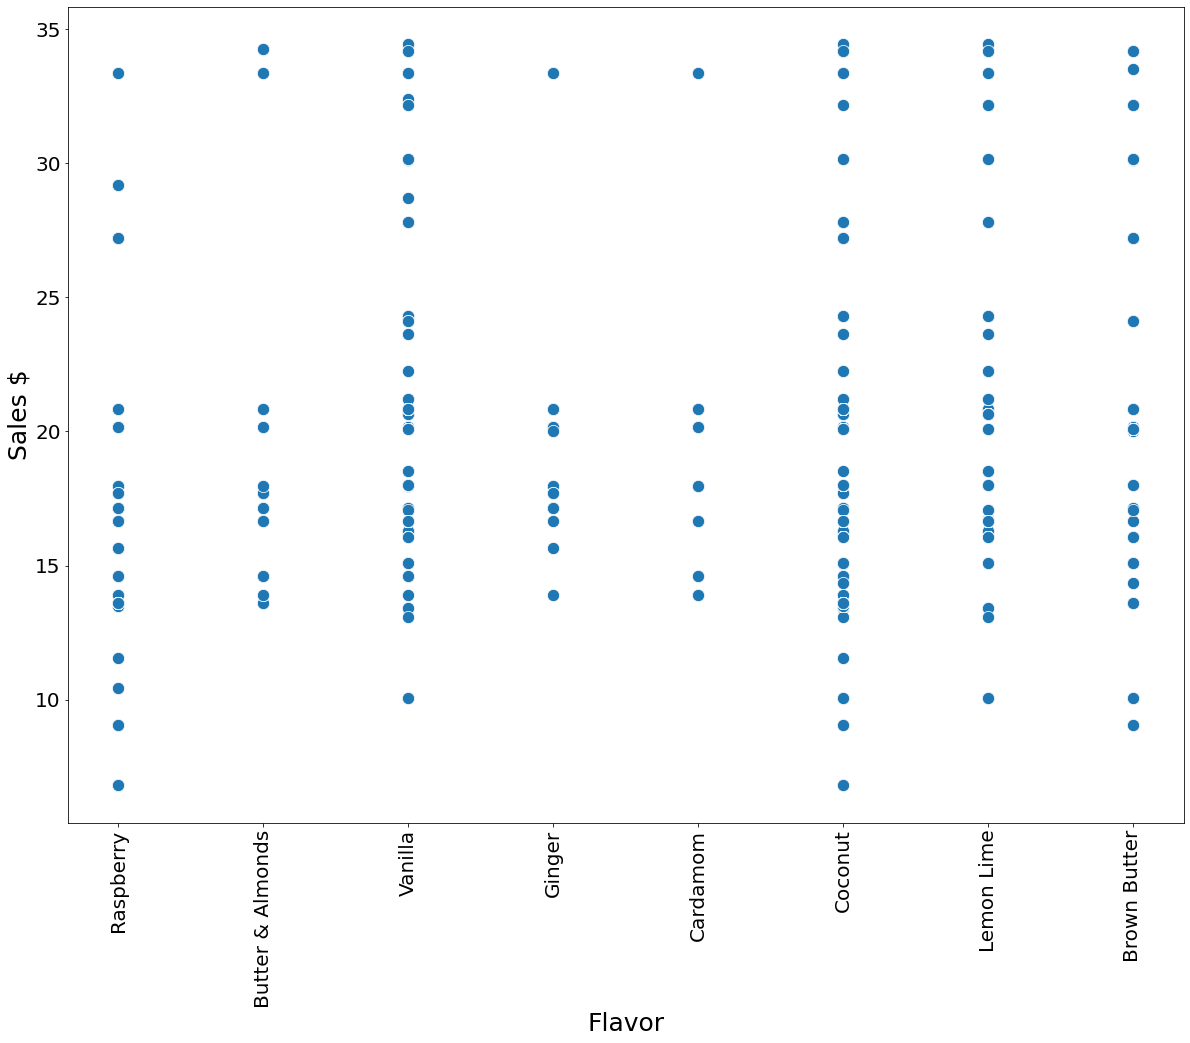

In [39]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='Flavor', y='Sales',data=df_copy, s=150)
plt.xlabel('Flavor', fontsize=25)
plt.ylabel('Sales $', fontsize=25)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.xticks(rotation=90)

In [40]:
Warehouse_Sales=df_copy.groupby(df_copy['Warehouse']).agg({'Sales':'sum'}).reset_index()

In [41]:
Vendor_Sales=df_copy.groupby(df_copy['Vendor']).agg({'Sales':'sum'}).reset_index()

In [42]:
City_Sales=df_copy.groupby(df_copy['City']).agg({'Sales':'sum'}).reset_index()

In [43]:
weekday_Sales=df_copy.groupby(df_copy['Day']).agg({'Sales':'sum'}).reset_index()

In [44]:
Month_Sales=df_copy.groupby(df_copy['Month']).agg({'Sales':'sum'}).reset_index()

In [71]:
State_Sales=df_copy.groupby(df_copy['State']).agg({'Sales':'sum'}).reset_index()

In [72]:
Size_Sales=df_copy.groupby(df_copy['Size']).agg({'Sales':'sum'}).reset_index()

(array([-200., -150., -100.,  -50.,    0.,   50.,  100.,  150.,  200.]),
 <a list of 9 Text major ticklabel objects>)

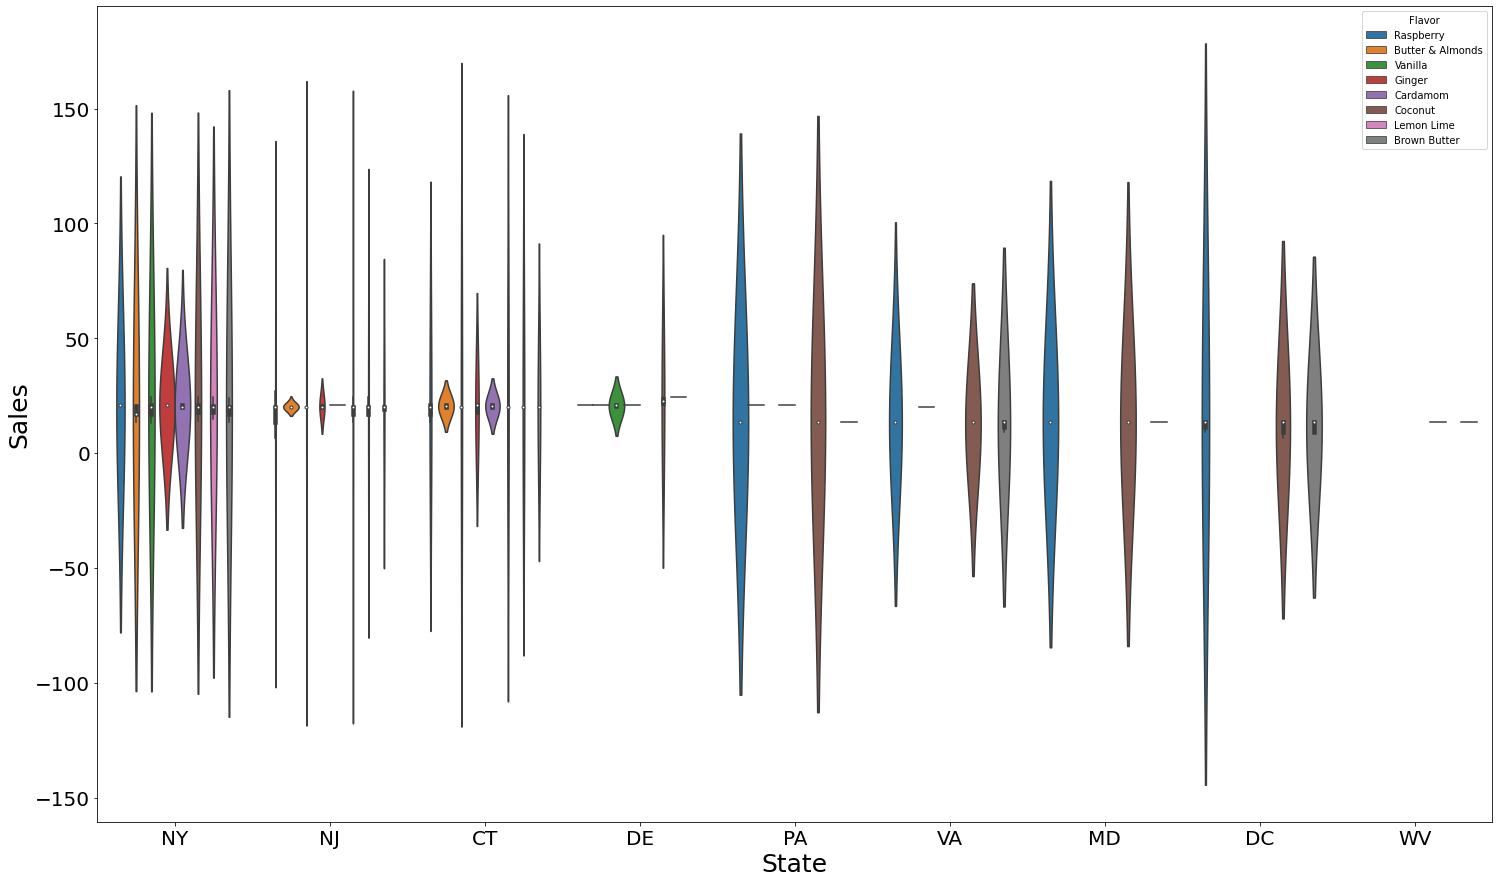

In [46]:
plt.figure(figsize=(25,15))
sns.violinplot(x='State', y='Sales', hue='Flavor', data=df_copy, bw=14.5)
plt.xlabel('State', fontsize=25)
plt.ylabel('Sales', fontsize=25)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

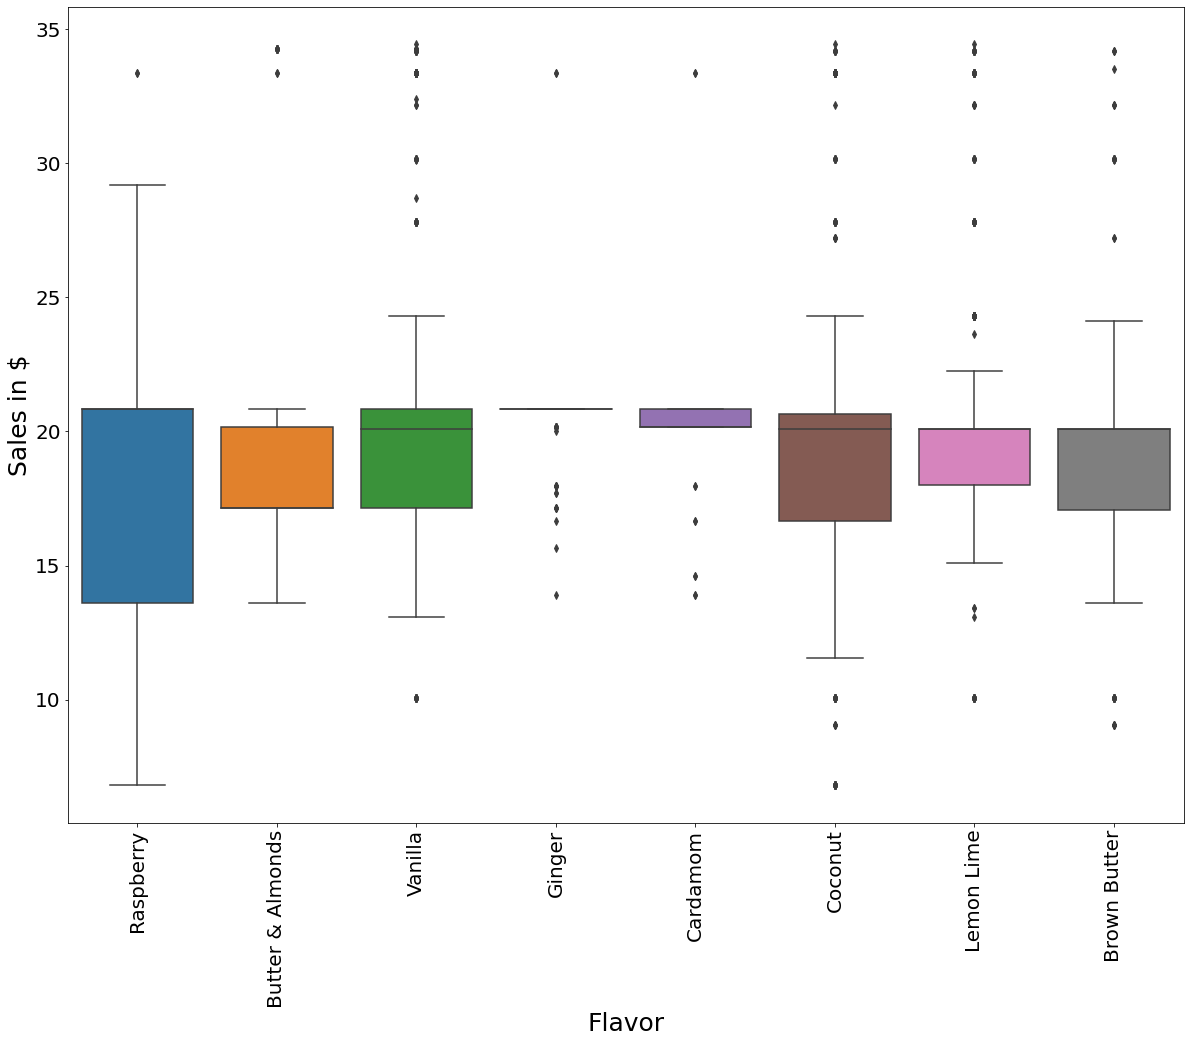

In [47]:
plt.figure(figsize=(20,15))
sns.boxplot(x='Flavor', y='Sales', data=df_copy)
plt.xlabel('Flavor', fontsize=25)
plt.ylabel('Sales in $', fontsize=25)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

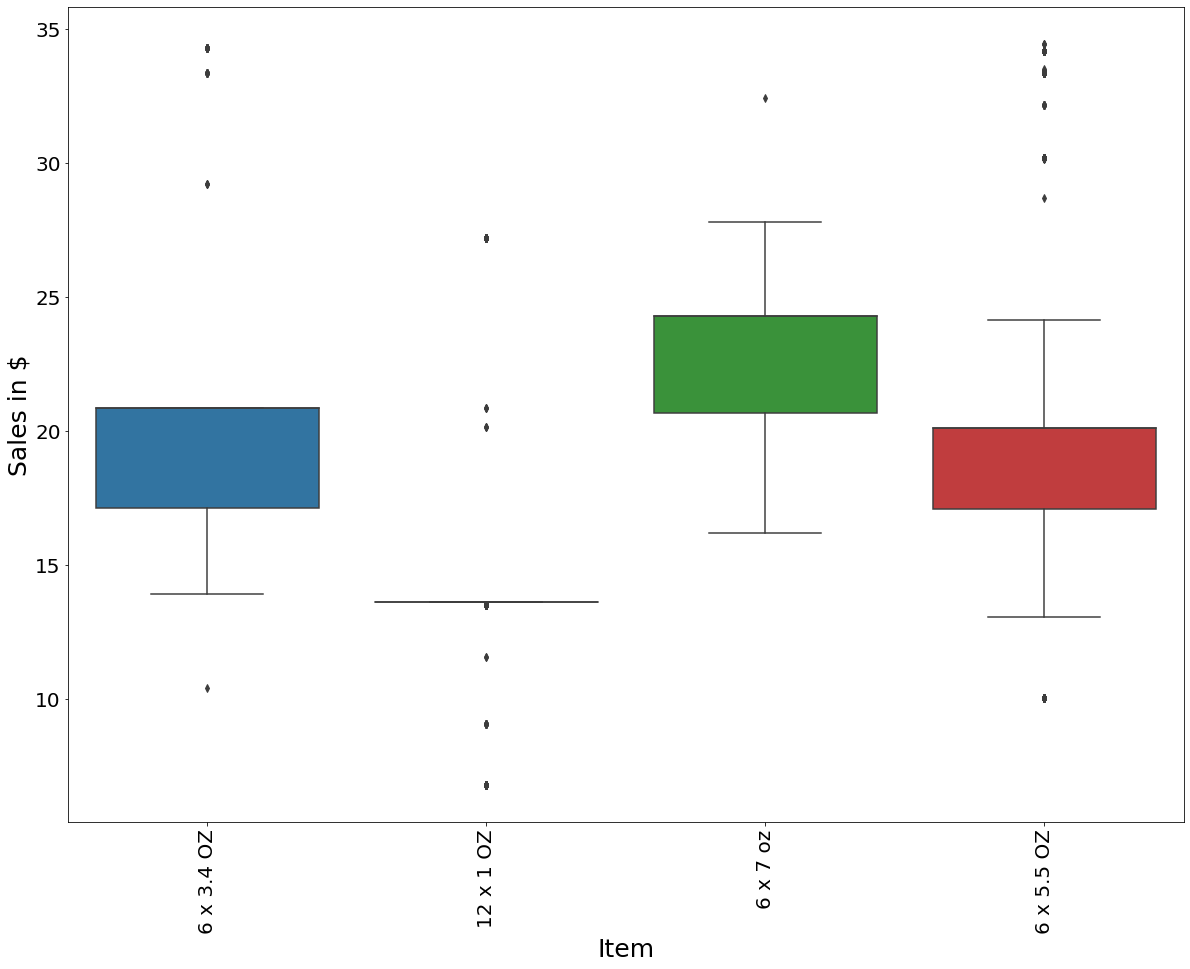

In [48]:
plt.figure(figsize=(20,15))
sns.boxplot(x='Size', y='Sales', data=df_copy)
plt.xlabel('Item', fontsize=25)
plt.ylabel('Sales in $', fontsize=25)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

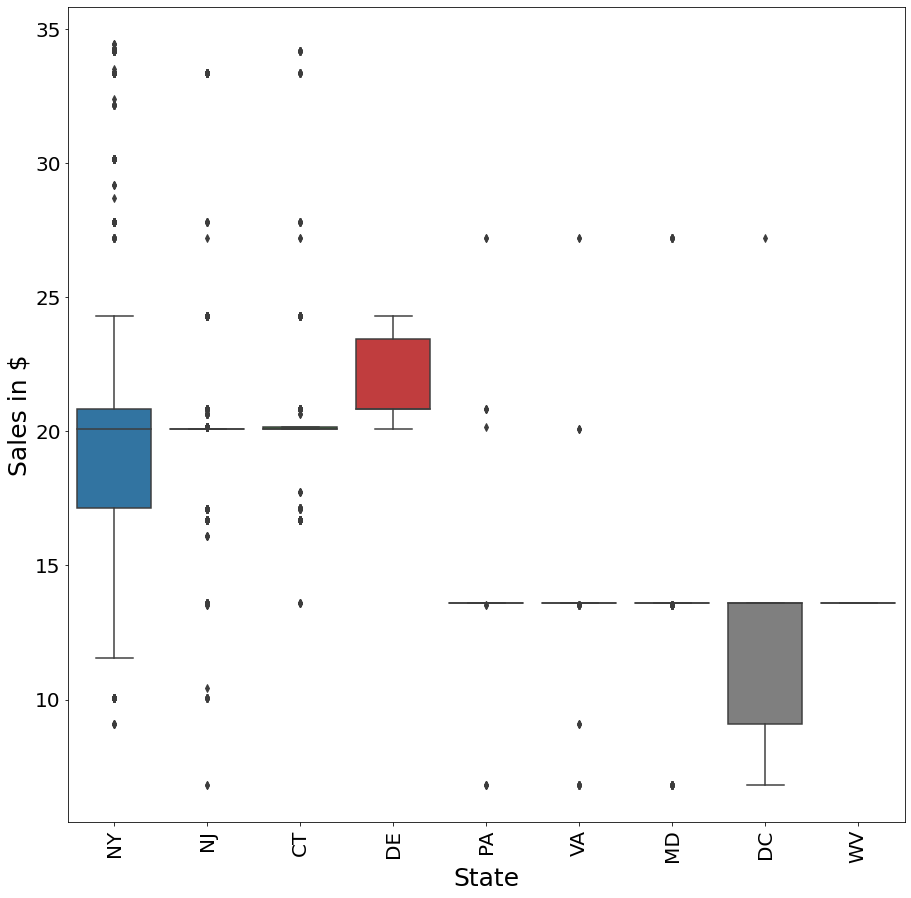

In [49]:
plt.figure(figsize=(15,15))
sns.boxplot(x='State', y='Sales', data=df_copy)
plt.xlabel('State', fontsize=25)
plt.ylabel('Sales in $', fontsize=25)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

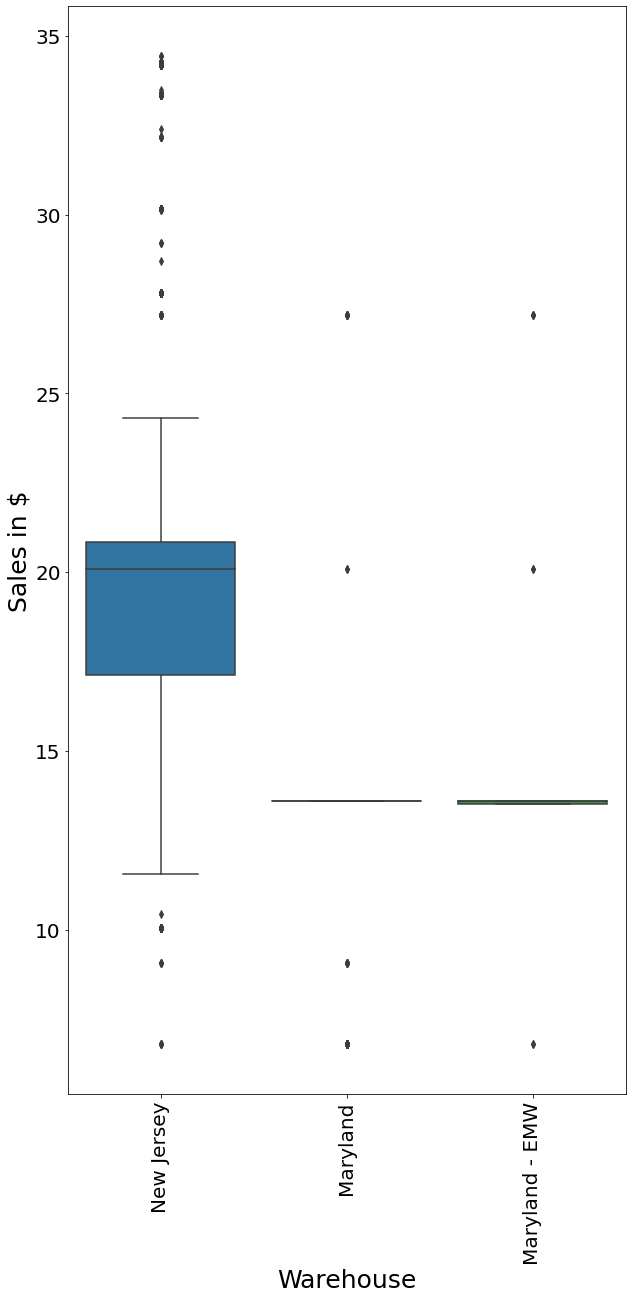

In [50]:
plt.figure(figsize=(10,20))
sns.boxplot(x='Warehouse', y='Sales', data=df_copy)
plt.xlabel('Warehouse', fontsize=25)
plt.ylabel('Sales in $', fontsize=25)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.xticks(rotation=90)

In [51]:
df_copy['Size'].unique()

array(['6 x 3.4 OZ', '12 x 1 OZ', '6 x 7 oz', '6 x 5.5 OZ'], dtype=object)

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 7 Text major ticklabel objects>)

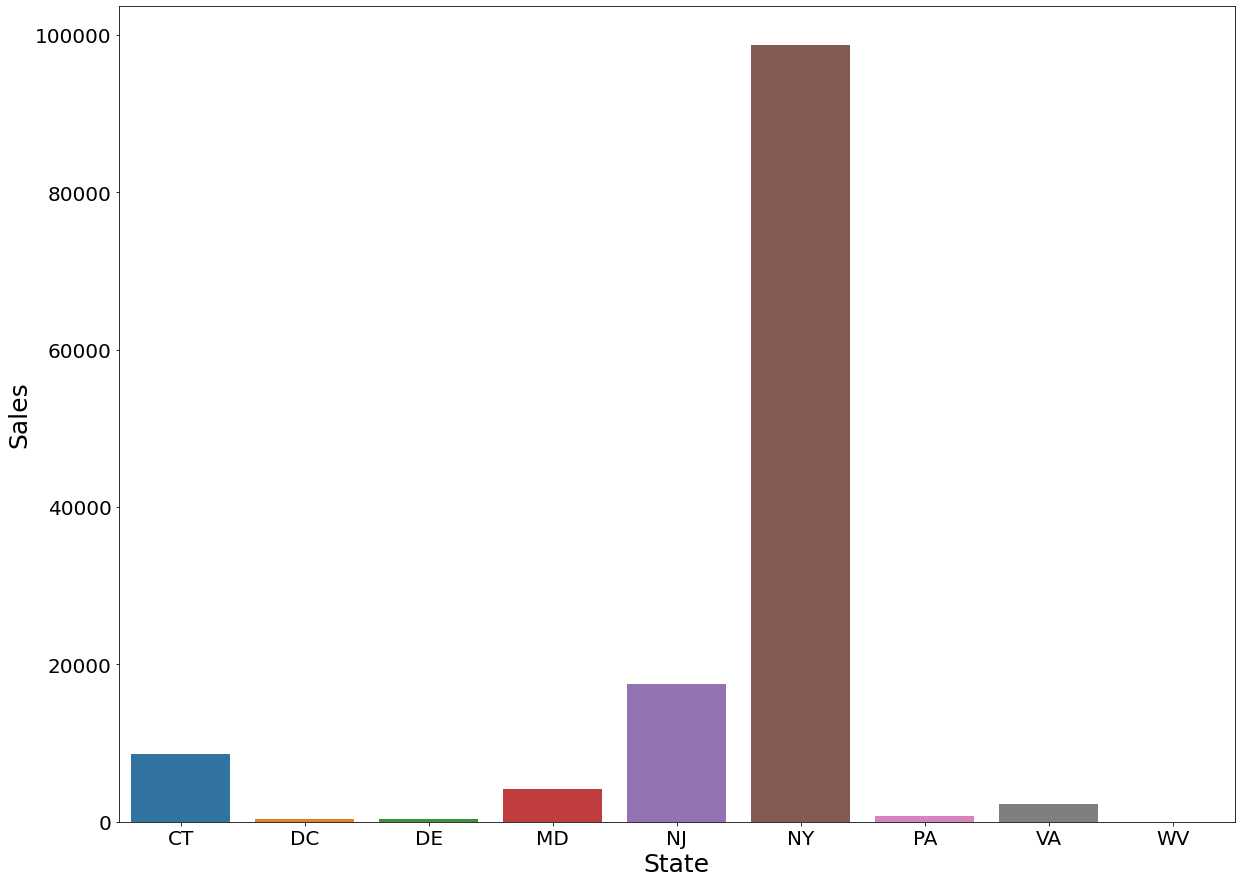

In [52]:
plt.figure(figsize=(20,15))
sns.barplot(x=State_Sales['State'], y=State_Sales['Sales'])
plt.xlabel('State', fontsize=25)
plt.ylabel('Sales', fontsize=25)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)

In [53]:
df_copy[df_copy['State']=='DE']

,Vendor,Size,Sales,City,State,Warehouse,Flavor,Month,Day
1567,Janssen's Market LLC,6 x 3.4 OZ,20.85,Wilmington,DE,New Jersey,Vanilla,December,Saturday
1568,Janssen's Market LLC,6 x 3.4 OZ,20.85,Wilmington,DE,New Jersey,Ginger,December,Saturday
1569,Janssen's Market LLC,6 x 3.4 OZ,20.85,Wilmington,DE,New Jersey,Raspberry,December,Saturday
2288,Janssen's Market LLC,6 x 3.4 OZ,20.85,Wilmington,DE,New Jersey,Ginger,April,Thursday
2614,Janssen's Market LLC,6 x 3.4 OZ,20.85,Wilmington,DE,New Jersey,Raspberry,June,Wednesday
2615,Janssen's Market LLC,6 x 3.4 OZ,20.85,Wilmington,DE,New Jersey,Coconut,June,Wednesday
2616,Janssen's Market LLC,6 x 3.4 OZ,20.85,Wilmington,DE,New Jersey,Vanilla,June,Wednesday
2874,Janssen's Market LLC,6 x 7 oz,24.30,Wilmington,DE,New Jersey,Lemon Lime,August,Saturday
2924,Janssen's Market LLC,6 x 7 oz,24.30,Wilmington,DE,New Jersey,Coconut,August,Saturday
2925,Janssen's Market LLC,6 x 3.4 OZ,20.85,Wilmington,DE,New Jersey,Raspberry,August,Saturday


Text(0, 0.5, 'Total Sales $')

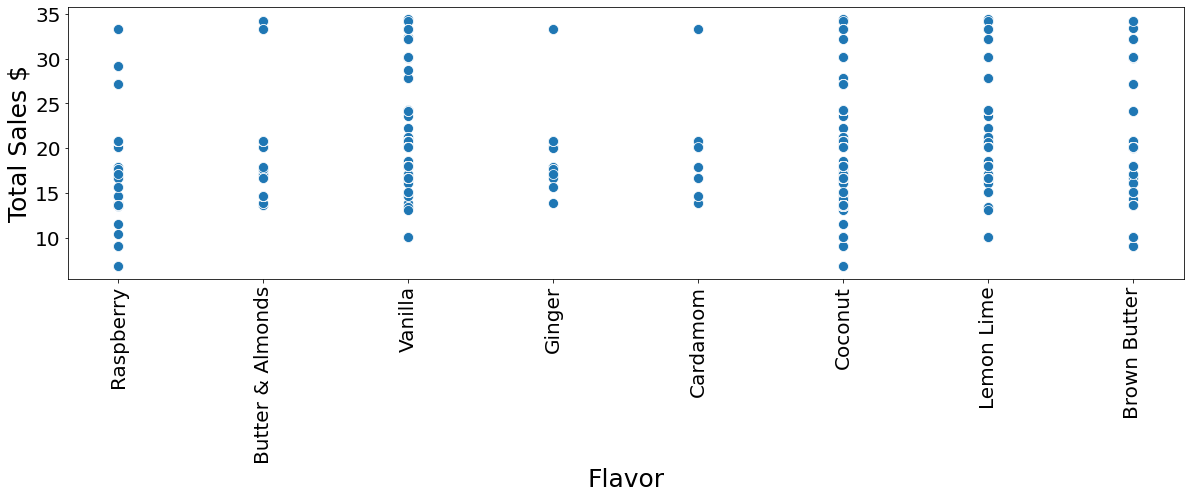

In [54]:
plt.figure(figsize = (20,5))
sns.scatterplot(x=df_copy['Flavor'], y=df_copy['Sales'], s=100)
plt.xticks(rotation=90)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.xlabel('Flavor',fontsize=25)
plt.ylabel('Total Sales $', fontsize=25)


No handles with labels found to put in legend.


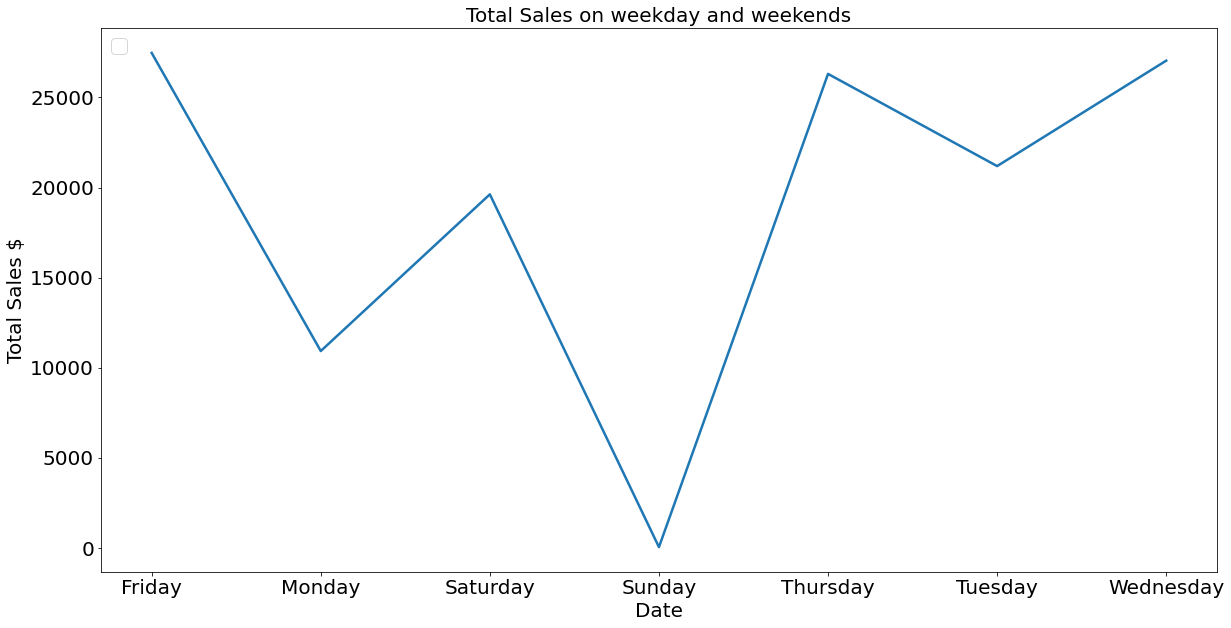

In [63]:
plt.figure(figsize=(20,10))
sns.lineplot(data=weekday_Sales, x='Day', y='Sales', palette=['orange'], linewidth=2.5)
#sns.lineplot(data=Total_Sales, palette=['orange'], linewidth=2.5)
plt.title('Total Sales on weekday and weekends',fontsize=20)
plt.legend(['Total Sales $'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Sales $', fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.legend(loc=2,prop={'size': 20})

No handles with labels found to put in legend.


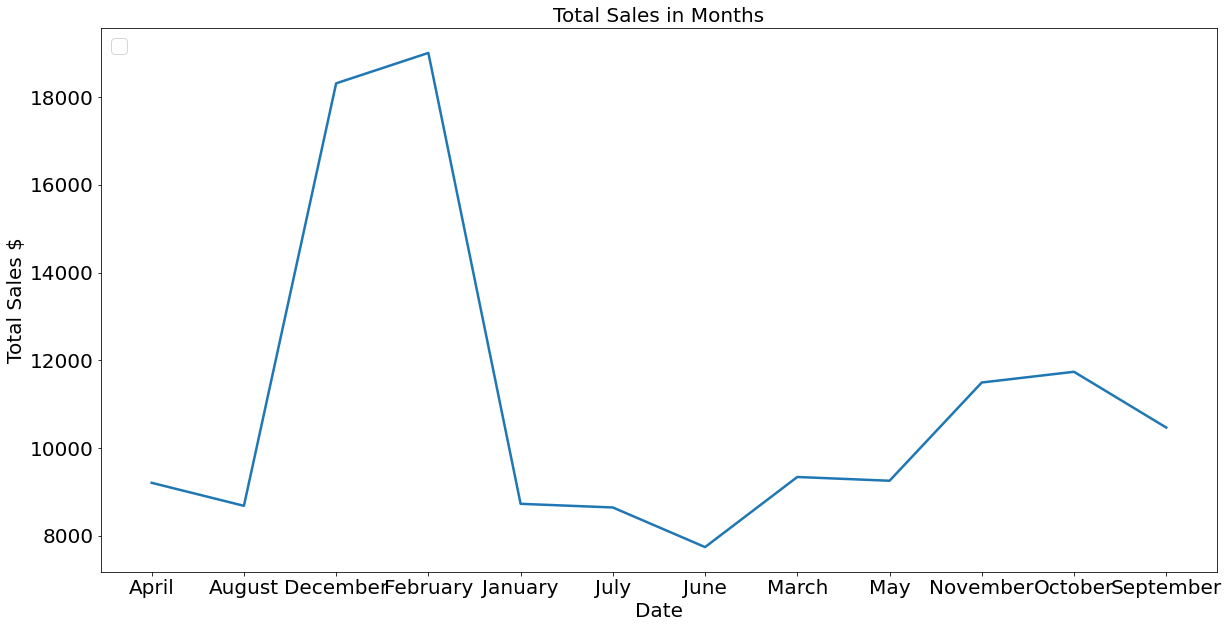

In [65]:
plt.figure(figsize=(20,10))
sns.lineplot(data=Month_Sales, x='Month', y='Sales', palette=['orange'], linewidth=2.5)
#sns.lineplot(data=Total_Sales, palette=['orange'], linewidth=2.5)
plt.title('Total Sales in Months',fontsize=20)
plt.legend(['Total Sales $'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Sales $', fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.legend(loc=2,prop={'size': 20})

In [56]:
df_copy['Vendor'].unique()

array(['Quincy', 'WFM-NYC HRM - HARLEM', 'Back To the Land Natural Foods',
       'Higganum Village Market', 'Natural Market Long Island',
       'Associated Waverly ( Raffy)', 'WFM-NYC CIR - COLUMBUS CIRCLE',
       'Bad Wife', 'Shop Fair Supermarket (1125 Fulton Street)',
       'Park Slope Food Coop', 'AREA 19 Vape & Smoke shope',
       'Natural Frontier Market 1104 Cortelyou Rd',
       'Food Universe Store#1804', 'Corner Grocery',
       'Food Bazaar #41 - LIC', 'Village Market',
       'Organic Convenience, Inc.',
       'Gracefully Gourmet Market - 23rd St.',
       'Green Bay Organic - 30th Avenue', 'Gourmet Fresh',
       "Mother Earth's Storehouse (Poughkeepsie)",
       'Brooklyn Fare (200 Schermerhorn St.)', 'Fruit Ranch',
       'West Side Market - 3rd Ave',
       'Queens Blvd Organic, Inc (DBA Hi Mango)', 'WFM-NYC UWS - 97th St',
       'Gracefully - West End Ave', 'Mt. Kisco Farm',
       'Food Cellar Corp - LIC', 'C Town @ Graham Ave.',
       'Wholesome Foods Market 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142],
 <a list of 143 Text major ticklabel objects>)

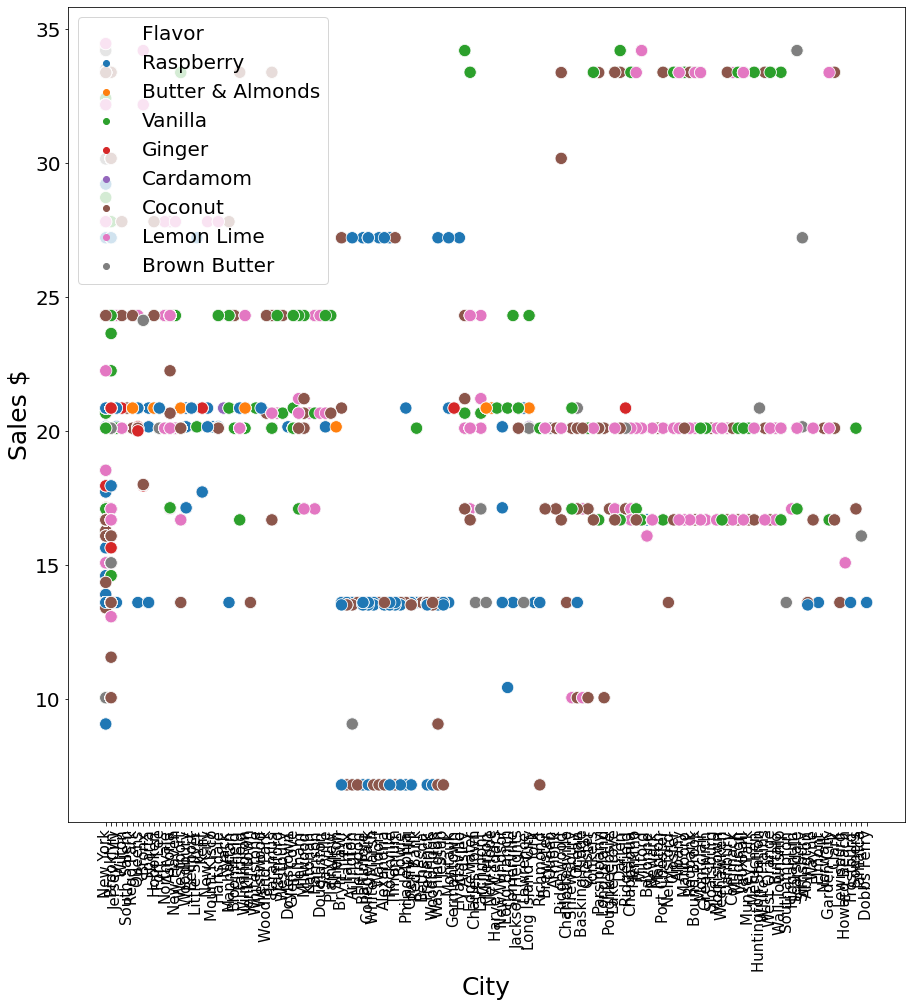

In [67]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='City', y='Sales', hue='Flavor', data=df_copy, s=150)
plt.xlabel('City', fontsize=25)
plt.ylabel('Sales $', fontsize=25)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=20)
plt.legend(loc=2, prop={'size': 20})
plt.xticks(rotation=90)

In [58]:
City_Sales=df_copy.groupby(['City']).agg({'Sales':'sum'}).reset_index()

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

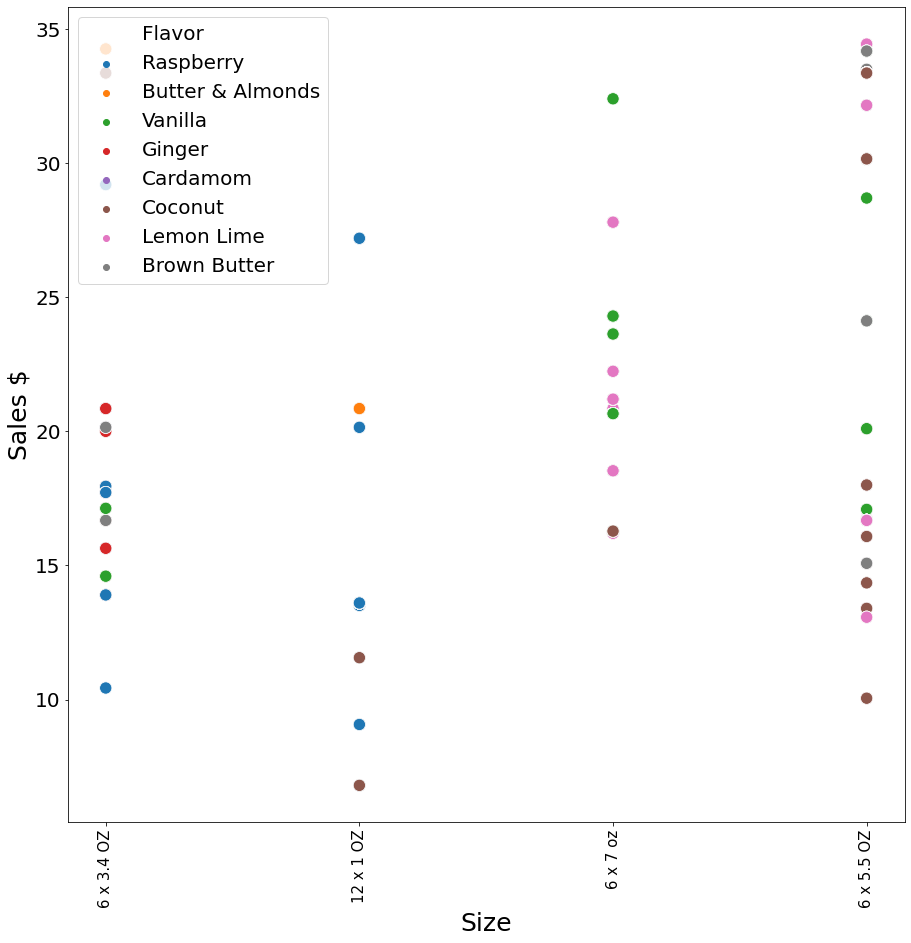

In [69]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='Size', y='Sales', hue='Flavor', data=df_copy, s=150)
plt.xlabel('Size', fontsize=25)
plt.ylabel('Sales $', fontsize=25)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=20)
plt.legend(loc=2, prop={'size': 20})
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]),
 <a list of 143 Text major ticklabel objects>)

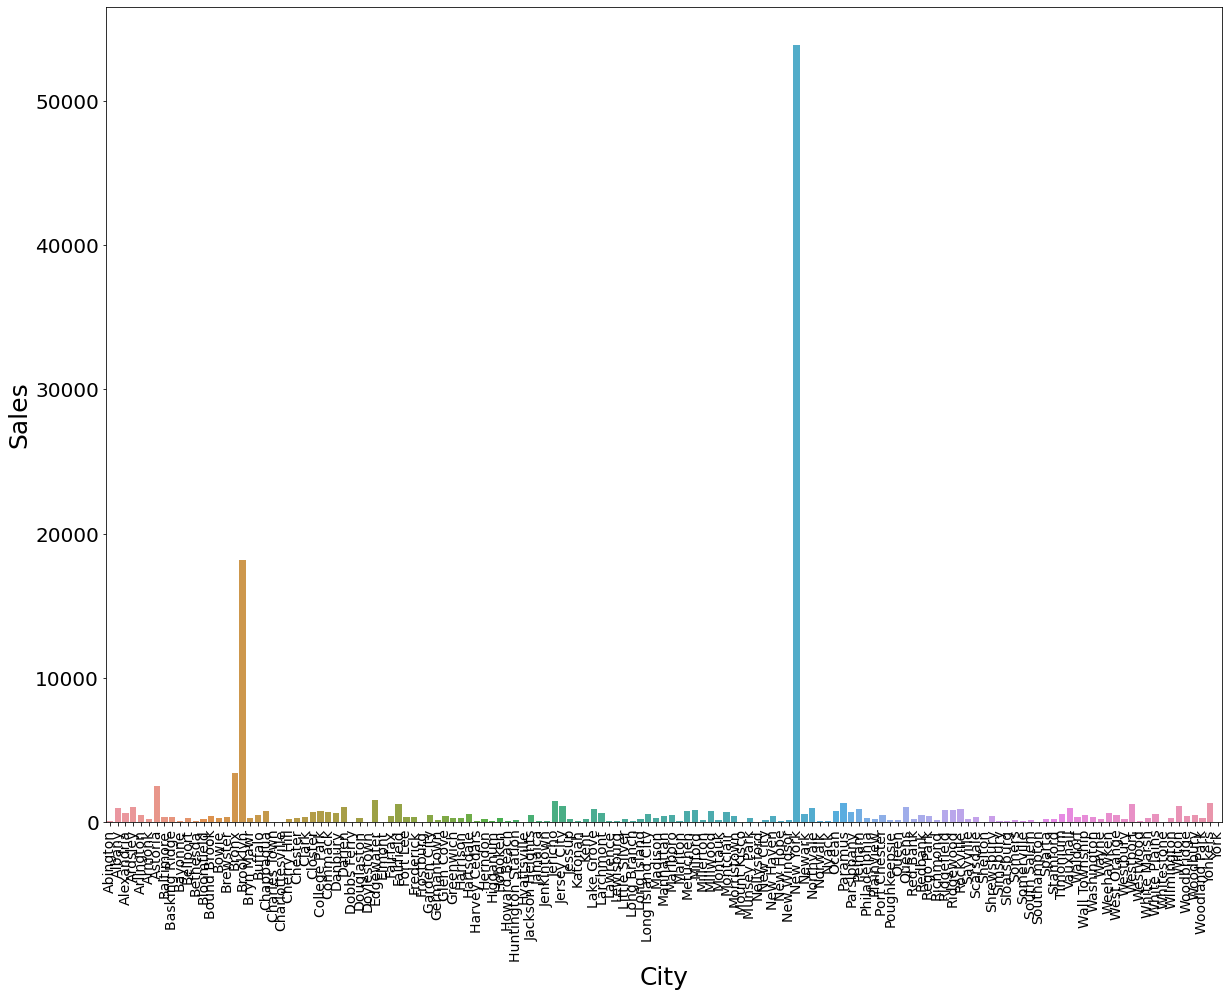

In [59]:
plt.figure(figsize=(20,15))
sns.barplot(x=City_Sales['City'], y=City_Sales['Sales'])
plt.xlabel('City', fontsize=25)
plt.ylabel('Sales', fontsize=25)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=20)
plt.xticks(rotation=90)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text major ticklabel objects>)

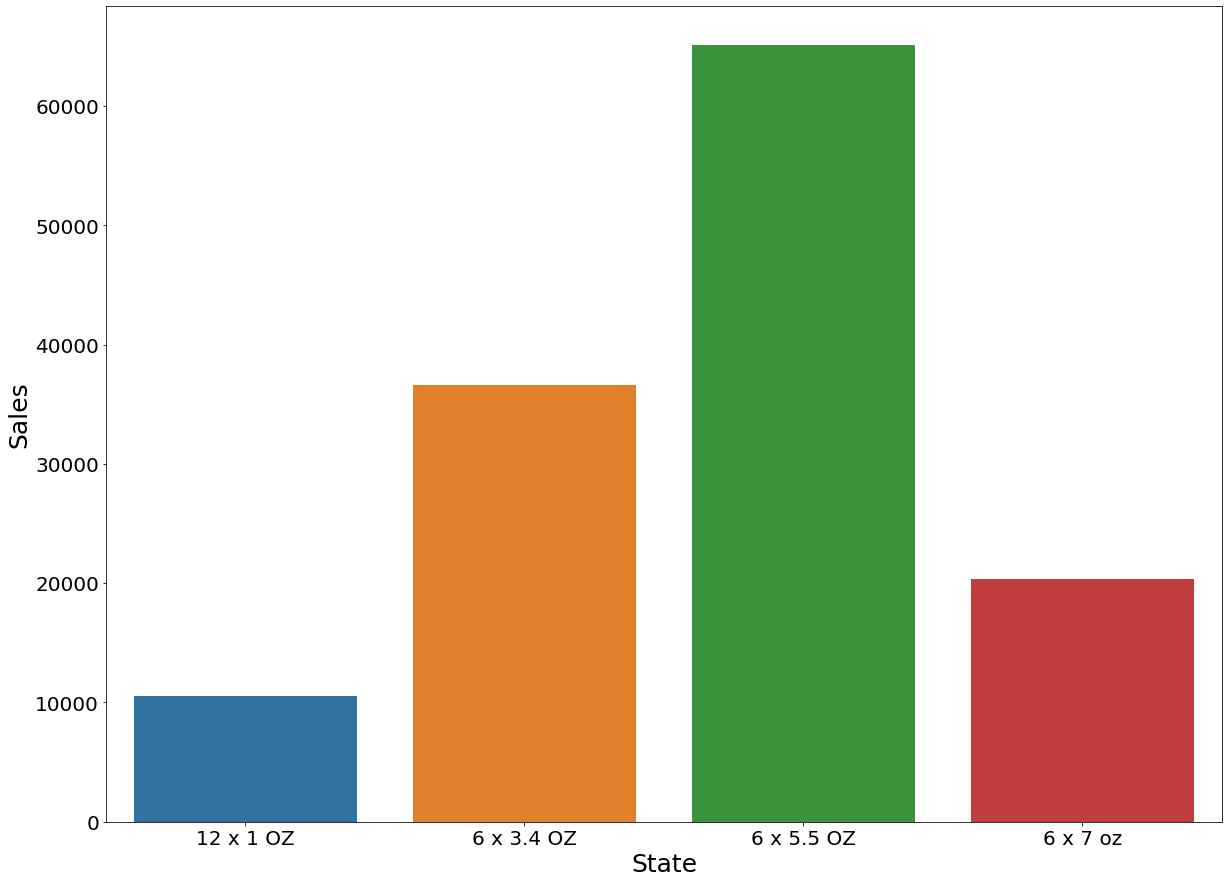

In [73]:
plt.figure(figsize=(20,15))
sns.barplot(x=Size_Sales['Size'], y=Size_Sales['Sales'])
plt.xlabel('State', fontsize=25)
plt.ylabel('Sales', fontsize=25)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)

In [74]:
City_Sales.describe()

,Sales
count,143.000000
mean,927.427273
std,4719.425890
min,13.600000
25%,116.215000
50%,285.330000
75%,628.670000
max,53853.100000


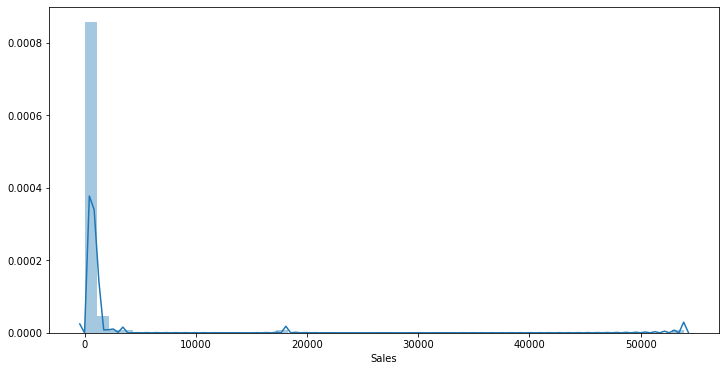

In [75]:
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(City_Sales['Sales'])


In [76]:
df_copy.nunique()

Vendor       449
Size           4
Sales         51
City         143
State          9
Warehouse      3
Flavor         8
Month         12
Day            7
dtype: int64

In [ ]:
df_copy.shape

## Categorical Data Transformstion:

In [ ]:
#from sklearn.preprocessing import OrdinalEncoder

In [107]:
df_copy

,Vendor,Size,Sales,City,State,Warehouse,Flavor,Month,Day
0,Quincy,6 x 3.4 OZ,20.85,New York,NY,New Jersey,Raspberry,February,Saturday
1,Quincy,6 x 3.4 OZ,17.13,New York,NY,New Jersey,Butter & Almonds,February,Saturday
2,Quincy,6 x 3.4 OZ,17.13,New York,NY,New Jersey,Vanilla,February,Saturday
3,Quincy,6 x 3.4 OZ,20.85,New York,NY,New Jersey,Ginger,February,Saturday
4,Quincy,6 x 3.4 OZ,20.15,New York,NY,New Jersey,Cardamom,February,Saturday
...,...,...,...,...,...,...,...,...,...
8460,WFM - NE WBU - WESTBURY,6 x 5.5 OZ,20.10,Garden City,NY,New Jersey,Lemon Lime,February,Saturday
8461,WFM - NE SLW - WALL TOWNSHIP,6 x 5.5 OZ,20.10,Wall Township,NJ,New Jersey,Lemon Lime,February,Saturday
8463,Fresh Direct - Bronx,6 x 5.5 OZ,18.00,Bronx,NY,New Jersey,Coconut,February,Saturday
8466,WFM - NE WEE - WEEHAWKEN,6 x 5.5 OZ,20.10,Weehawken,NJ,New Jersey,Lemon Lime,February,Saturday


In [108]:
df_copy.describe()

,Sales
count,6777.000000
mean,19.569441
std,4.110349
min,6.800000
25%,17.090000
50%,20.100000
75%,20.850000
max,34.440000


In [109]:
df_copy.nunique()

Vendor       449
Size           4
Sales         51
City         143
State          9
Warehouse      3
Flavor         8
Month         12
Day            7
dtype: int64

In [110]:
y=df_copy.iloc[:,2]

In [111]:
y

0       20.85
1       17.13
2       17.13
3       20.85
4       20.15
        ...  
8460    20.10
8461    20.10
8463    18.00
8466    20.10
8467    20.10
Name: Sales, Length: 6777, dtype: float64

In [112]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6777 entries, 0 to 8467
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Vendor     6777 non-null   object 
 1   Size       6777 non-null   object 
 2   Sales      6777 non-null   float64
 3   City       6777 non-null   object 
 4   State      6777 non-null   object 
 5   Warehouse  6777 non-null   object 
 6   Flavor     6777 non-null   object 
 7   Month      6777 non-null   object 
 8   Day        6777 non-null   object 
dtypes: float64(1), object(8)
memory usage: 849.5+ KB


In [113]:
df_copy

,Vendor,Size,Sales,City,State,Warehouse,Flavor,Month,Day
0,Quincy,6 x 3.4 OZ,20.85,New York,NY,New Jersey,Raspberry,February,Saturday
1,Quincy,6 x 3.4 OZ,17.13,New York,NY,New Jersey,Butter & Almonds,February,Saturday
2,Quincy,6 x 3.4 OZ,17.13,New York,NY,New Jersey,Vanilla,February,Saturday
3,Quincy,6 x 3.4 OZ,20.85,New York,NY,New Jersey,Ginger,February,Saturday
4,Quincy,6 x 3.4 OZ,20.15,New York,NY,New Jersey,Cardamom,February,Saturday
...,...,...,...,...,...,...,...,...,...
8460,WFM - NE WBU - WESTBURY,6 x 5.5 OZ,20.10,Garden City,NY,New Jersey,Lemon Lime,February,Saturday
8461,WFM - NE SLW - WALL TOWNSHIP,6 x 5.5 OZ,20.10,Wall Township,NJ,New Jersey,Lemon Lime,February,Saturday
8463,Fresh Direct - Bronx,6 x 5.5 OZ,18.00,Bronx,NY,New Jersey,Coconut,February,Saturday
8466,WFM - NE WEE - WEEHAWKEN,6 x 5.5 OZ,20.10,Weehawken,NJ,New Jersey,Lemon Lime,February,Saturday


In [114]:
X=df_copy.iloc[:,[0,1,3,4,5,6,7,8]]

In [115]:
X
##

,Vendor,Size,City,State,Warehouse,Flavor,Month,Day
0,Quincy,6 x 3.4 OZ,New York,NY,New Jersey,Raspberry,February,Saturday
1,Quincy,6 x 3.4 OZ,New York,NY,New Jersey,Butter & Almonds,February,Saturday
2,Quincy,6 x 3.4 OZ,New York,NY,New Jersey,Vanilla,February,Saturday
3,Quincy,6 x 3.4 OZ,New York,NY,New Jersey,Ginger,February,Saturday
4,Quincy,6 x 3.4 OZ,New York,NY,New Jersey,Cardamom,February,Saturday
...,...,...,...,...,...,...,...,...
8460,WFM - NE WBU - WESTBURY,6 x 5.5 OZ,Garden City,NY,New Jersey,Lemon Lime,February,Saturday
8461,WFM - NE SLW - WALL TOWNSHIP,6 x 5.5 OZ,Wall Township,NJ,New Jersey,Lemon Lime,February,Saturday
8463,Fresh Direct - Bronx,6 x 5.5 OZ,Bronx,NY,New Jersey,Coconut,February,Saturday
8466,WFM - NE WEE - WEEHAWKEN,6 x 5.5 OZ,Weehawken,NJ,New Jersey,Lemon Lime,February,Saturday


In [116]:
X.nunique()

Vendor       449
Size           4
City         143
State          9
Warehouse      3
Flavor         8
Month         12
Day            7
dtype: int64

In [117]:
X

,Vendor,Size,City,State,Warehouse,Flavor,Month,Day
0,Quincy,6 x 3.4 OZ,New York,NY,New Jersey,Raspberry,February,Saturday
1,Quincy,6 x 3.4 OZ,New York,NY,New Jersey,Butter & Almonds,February,Saturday
2,Quincy,6 x 3.4 OZ,New York,NY,New Jersey,Vanilla,February,Saturday
3,Quincy,6 x 3.4 OZ,New York,NY,New Jersey,Ginger,February,Saturday
4,Quincy,6 x 3.4 OZ,New York,NY,New Jersey,Cardamom,February,Saturday
...,...,...,...,...,...,...,...,...
8460,WFM - NE WBU - WESTBURY,6 x 5.5 OZ,Garden City,NY,New Jersey,Lemon Lime,February,Saturday
8461,WFM - NE SLW - WALL TOWNSHIP,6 x 5.5 OZ,Wall Township,NJ,New Jersey,Lemon Lime,February,Saturday
8463,Fresh Direct - Bronx,6 x 5.5 OZ,Bronx,NY,New Jersey,Coconut,February,Saturday
8466,WFM - NE WEE - WEEHAWKEN,6 x 5.5 OZ,Weehawken,NJ,New Jersey,Lemon Lime,February,Saturday


In [118]:
encoded_x =None
for i in [1,3,4,5,6,7]:
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X.iloc[:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = np.concatenate((encoded_x, feature), axis=1)

encoded_feature1=label_encoder.fit_transform(X.iloc[:,0])
encoded_feature2=label_encoder.fit_transform(X.iloc[:,2])
encoded_feature1=encoded_feature1.reshape(X.shape[0],1)
encoded_feature2=encoded_feature2.reshape(X.shape[0],1)
encoded_x=np.concatenate((encoded_feature1,encoded_feature2,encoded_x), axis=1)

In [119]:
encoded_x

array([[304.,  88.,   0., ...,   0.,   0.,   0.],
       [304.,  88.,   0., ...,   0.,   0.,   0.],
       [304.,  88.,   0., ...,   0.,   0.,   0.],
       ...,
       [133.,  16.,   0., ...,   0.,   0.,   0.],
       [399., 128.,   0., ...,   0.,   0.,   0.],
       [415.,  88.,   0., ...,   0.,   0.,   0.]])

## Split Data Into Train and Test

In [120]:
X_train, X_test, y_train, y_test = train_test_split (encoded_x, y, test_size=0.3, random_state=123)

## Fit the Model to the training Set

In [121]:
from xgboost import XGBRegressor
from xgboost import cv
from xgboost import DMatrix
data_dmatrix = DMatrix(data=encoded_x,label=y)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.25,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
cv_results = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [122]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.631457,0.056315,17.631183,0.126401
1,15.946945,0.050484,15.946425,0.139118
2,14.440530,0.051283,14.439603,0.143616
3,13.094964,0.053344,13.097931,0.150629
4,11.887144,0.057419,11.890973,0.153783


In [123]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.130604
Name: test-rmse-mean, dtype: float64


[10:59:39] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=10,
             min_child_weight=1, min_samples_leaf=60, min_samples_split=1200,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=8, num_parallel_tree=1, random_state=10, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)
RMSE: 2.311869


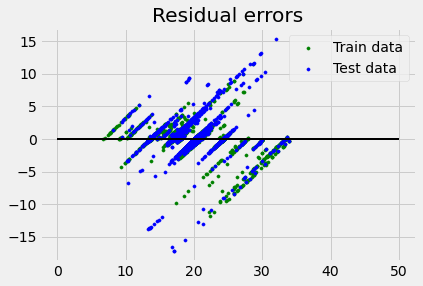

In [124]:
from xgboost import XGBRegressor
params = {'n_estimators':1000,
          'max_depth':10,
          'min_samples_split': 1200,
          'learning_rate': 0.01,
         'min_samples_leaf':60,
         'random_state':10,
         'subsample':0.5,
         }
xg_reg = XGBRegressor(**params)
#xg_reg = XGBRegressor()
xg_reg.fit(X_train, y_train)
print (xg_reg)
from sklearn.metrics import mean_squared_error
y_pred=xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))
from sklearn.metrics import mean_absolute_error
MAE= np.sqrt(mean_absolute_error(y_test, y_pred))
print('MAE: %f' % (MAE))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))



 #plot for residual erro#
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(xg_reg.predict(X_train), xg_reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(xg_reg.predict(X_test), xg_reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 ## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()


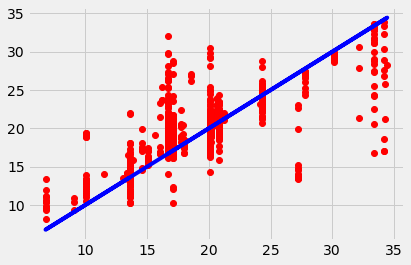

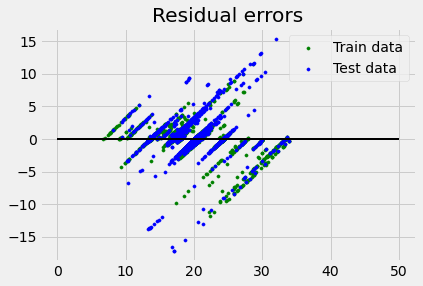

In [136]:

plt.plot(y_test, y_pred,'ro')
plt.plot(y_test, y_test,'b-')
plt.show()




plt.scatter(xg_reg.predict(X_train), xg_reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(xg_reg.predict(X_test), xg_reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
    
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 ## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## Two-Way Anova

In [129]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings( "ignore" )

formula = 'Sales ~ C(Month) + C(Day) + C(Month):C(Day)'
model = ols(formula, df_copy).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                        sum_sq      df          F        PR(>F)
C(Month)           1154.794768    11.0   6.566040  1.041595e-02
C(Day)             1872.734255     6.0  19.521640  1.046303e-22
C(Month):C(Day)    3589.297246    66.0   3.401394  2.941737e-16
Residual         107171.132439  6703.0        NaN           NaN


In [130]:
df_copy

,Vendor,Size,Sales,City,State,Warehouse,Flavor,Month,Day
0,Quincy,6 x 3.4 OZ,20.85,New York,NY,New Jersey,Raspberry,February,Saturday
1,Quincy,6 x 3.4 OZ,17.13,New York,NY,New Jersey,Butter & Almonds,February,Saturday
2,Quincy,6 x 3.4 OZ,17.13,New York,NY,New Jersey,Vanilla,February,Saturday
3,Quincy,6 x 3.4 OZ,20.85,New York,NY,New Jersey,Ginger,February,Saturday
4,Quincy,6 x 3.4 OZ,20.15,New York,NY,New Jersey,Cardamom,February,Saturday
...,...,...,...,...,...,...,...,...,...
8460,WFM - NE WBU - WESTBURY,6 x 5.5 OZ,20.10,Garden City,NY,New Jersey,Lemon Lime,February,Saturday
8461,WFM - NE SLW - WALL TOWNSHIP,6 x 5.5 OZ,20.10,Wall Township,NJ,New Jersey,Lemon Lime,February,Saturday
8463,Fresh Direct - Bronx,6 x 5.5 OZ,18.00,Bronx,NY,New Jersey,Coconut,February,Saturday
8466,WFM - NE WEE - WEEHAWKEN,6 x 5.5 OZ,20.10,Weehawken,NJ,New Jersey,Lemon Lime,February,Saturday


In [131]:
1.041595e-02 < 0.05

True

In [132]:
1.046303e-22 < 0.05

True

In [133]:
2.941737e-16 < 0.05

True

The p value obtained from ANOVA analysis for Sales, months, days and interaction are statistically significant (p<0.05). We conclude that the months significantly affects the sales outcome, days significantly affects the sales outcome, and interaction of both month and days significantly affect the sales outcome.

## B- Linear Regression Model

[['Quincy' '6 x 3.4 OZ' 'New York' ... 'Raspberry' 'February' 'Saturday']
 ['Quincy' '6 x 3.4 OZ' 'New York' ... 'Butter & Almonds' 'February'
  'Saturday']
 ['Quincy' '6 x 3.4 OZ' 'New York' ... 'Vanilla' 'February' 'Saturday']
 ...
 ['Fresh Direct - Bronx' '6 x 5.5 OZ' 'Bronx' ... 'Coconut' 'February'
  'Saturday']
 ['WFM - NE WEE - WEEHAWKEN' '6 x 5.5 OZ' 'Weehawken' ... 'Lemon Lime'
  'February' 'Saturday']
 ['WFM - NYC TRB - TRIBECA - 10245' '6 x 5.5 OZ' 'New York' ... 'Vanilla'
  'February' 'Saturday']]
Coefficients:  [ 2.49912421e-03  1.68895818e-03 -4.96051919e+00  1.93161798e-01
  3.56027776e-01  4.41132961e+00  4.69681172e-01 -2.21220252e+00
  1.04274197e+00  6.17960998e-02 -1.26094446e-01 -1.46347890e-01
 -4.04411243e-01 -3.16171129e-01  1.63100798e+00 -7.50498034e-01
 -8.66664568e-02  8.37164491e-01 -2.45093158e-01 -5.84027474e-01
  5.21878130e-01 -3.71604645e-01  9.78307678e-01 -4.53570534e-01
  4.90291788e-01 -3.36181784e-01 -3.71909735e-01 -1.79778138e-01
  1.86538259e-0

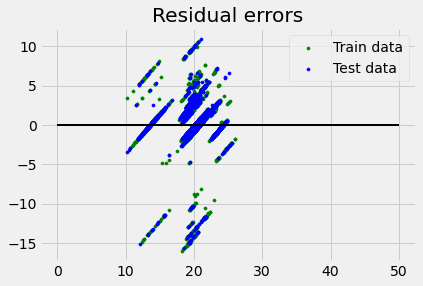

0.38243583018882044
Accuracy: 36.97524996505687


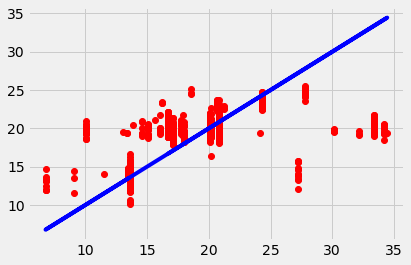

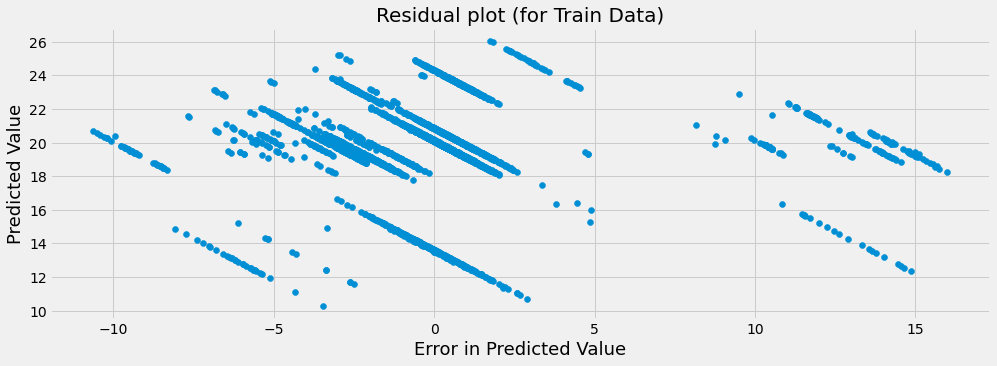

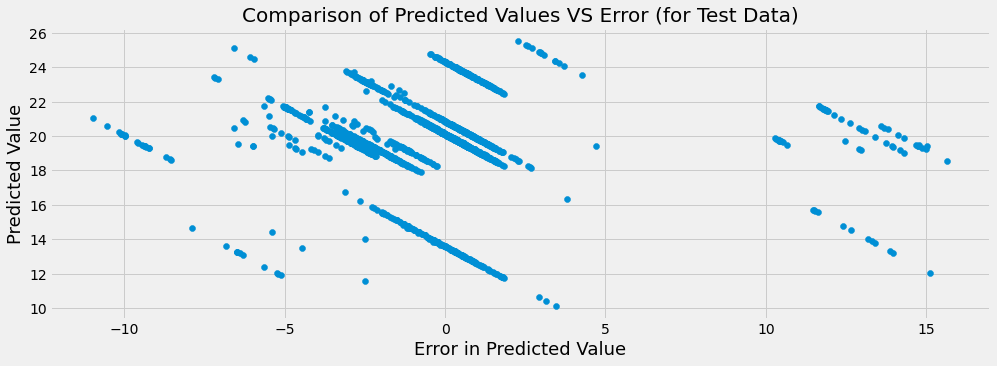

In [140]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

print(X)
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
y_pred2= reg.predict(X_test)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
print('Mean Squared Error: {}'.format(np.square(np.subtract(y_test,y_pred2)).mean()))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred2))

print('Accuracy:',reg.score(X_train, y_train)*100)
#sns.scatterplot(y_pred2, y_test)


plt.plot(y_test, y_pred2,'ro')
plt.plot(y_test, y_test,'b-')
plt.show()


residual_train = y_train - (reg.predict(X_train))
fig, ax = plt.subplots(figsize=(15,5))
plt.xlabel('Error in Predicted Value', fontsize = 18)
plt.ylabel('Predicted Value', fontsize = 18)
plt.title("Residual plot (for Train Data)", fontsize = 20)
_ = ax.scatter(residual_train,reg.predict(X_train))



residual_test = y_test - y_pred2
fig, ax = plt.subplots(figsize=(15,5))
plt.xlabel('Error in Predicted Value', fontsize = 18)
plt.ylabel('Predicted Value', fontsize = 18)
plt.title("Comparison of Predicted Values VS Error (for Test Data)", fontsize = 20)
_ = ax.scatter(residual_test, y_pred2)